[[[ 84  77  61]
  [ 79  72  56]
  [ 74  67  51]
  ...
  [134 118  93]
  [119 105  79]
  [126 112  86]]

 [[ 73  66  50]
  [ 48  41  25]
  [ 40  33  17]
  ...
  [149 133 108]
  [170 156 130]
  [142 128 102]]

 [[ 56  49  33]
  [ 59  52  36]
  [ 89  82  66]
  ...
  [169 153 128]
  [159 145 119]
  [162 148 122]]

 ...

 [[151 154 163]
  [170 173 182]
  [172 175 184]
  ...
  [116 121 125]
  [112 117 123]
  [116 121 127]]

 [[151 153 165]
  [185 187 199]
  [165 165 175]
  ...
  [136 141 145]
  [151 156 162]
  [148 153 159]]

 [[148 150 162]
  [155 157 169]
  [161 161 171]
  ...
  [162 167 171]
  [190 195 201]
  [178 183 189]]]
(3000, 4000, 3)


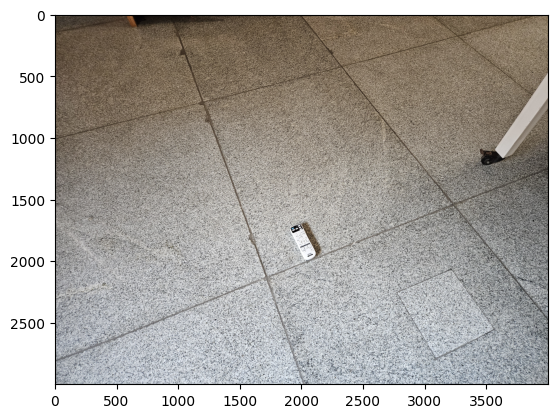

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img =  Image.open('21 Oct 2024 at 08_34.jpg')

# img.show()

np_img = np.array(img)
print(np_img)
print(np_img.shape)
plt.imshow(np_img)
plt.show()

### Forward warping

Rotation

In [21]:
theta = 1.57

# keeping the third dimension the same, rotating the first two
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
print(rotation_matrix.shape)

np_img_rotated = np.zeros_like(np_img)

center_row, center_col = np_img.shape[0] // 2, np_img.shape[1] // 2

for row in range(np_img.shape[0]):
    for col in range(np_img.shape[1]):
        translated_row, translated_col = row - center_row, col - center_col
        new_row, new_col = np.dot(rotation_matrix, [translated_row, translated_col])
        new_row, new_col = int(new_row + center_row), int(new_col + center_col)
        if 0 <= new_row < np_img.shape[0] and 0 <= new_col < np_img.shape[1]:
            np_img_rotated[new_row, new_col] = np_img[row, col]


(2, 2)


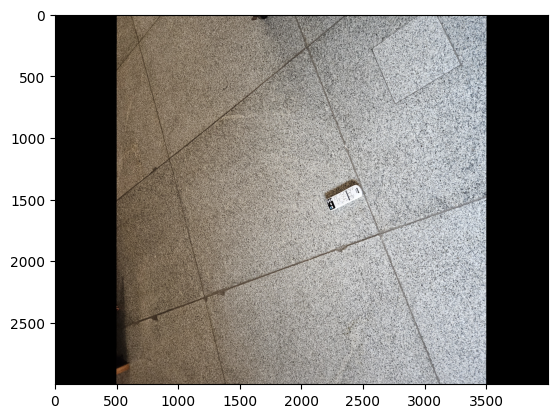

In [22]:
plt.imshow(np_img_rotated)

Skew

In [23]:
x_scale = 2
y_scale = 5

skew_matrix = np.array([[x_scale,0,0],[0,y_scale,0],[0,0,1]])

np_img_skewed = np.zeros_like(np_img_rotated)

for row in range(np_img_rotated.shape[0]):
    for col in range(np_img_rotated.shape[1]):
        np_img_skewed[row,col] = np.dot(skew_matrix,np_img_rotated[row,col])

In [32]:
x_scale = 0.5
y_scale = 0.9

skew_matrix = np.array([[x_scale, 0], [0, y_scale]])

# using the skew matrix to skew the image
np_img_skewed = np.zeros_like(np_img)

center_row, center_col = np_img.shape[0] // 2, np_img.shape[1] // 2

for row in range(np_img_rotated.shape[0]):
    for col in range(np_img_rotated.shape[1]):
        translated_row, translated_col = row - center_row, col - center_col
        new_row, new_col = np.dot(skew_matrix, [translated_row, translated_col])
        new_row, new_col = int(new_row + center_row), int(new_col + center_col)
        if 0 <= new_row < np_img_rotated.shape[0] and 0 <= new_col < np_img_rotated.shape[1]:
            np_img_skewed[new_row, new_col] = np_img_rotated[row, col]


In [33]:
print(np_img_skewed)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


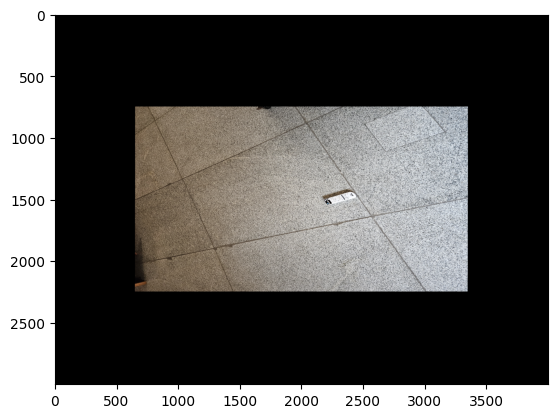

In [34]:
plt.imshow(np_img_skewed)

### Unwarp

reverse skewing

In [38]:
x_scale = 0.5
y_scale = 0.9

skew_matrix = np.array([[x_scale, 0], [0, y_scale]])

np_img_skewed_unwarped = np.zeros_like(np_img_skewed)

center_row, center_col = np_img.shape[0] // 2, np_img.shape[1] // 2

for row in range(np_img_skewed.shape[0]):
    for col in range(np_img_skewed.shape[1]):
        translated_row, translated_col = row - center_row, col - center_col
        new_row, new_col = np.dot(np.linalg.inv(skew_matrix), [translated_row, translated_col])
        new_row, new_col = int(new_row + center_row), int(new_col + center_col)
        if 0 <= new_row < np_img_skewed.shape[0] and 0 <= new_col < np_img_skewed.shape[1]:
            np_img_skewed_unwarped[new_row, new_col] = np_img_skewed[row, col]


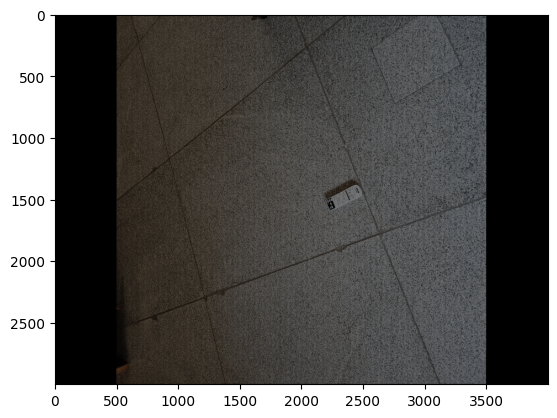

In [39]:
plt.imshow(np_img_skewed_unwarped)

reverse the rotation

In [40]:
x_scale = 0.5
y_scale = 0.9

skew_matrix = np.array([[x_scale, 0], [0, y_scale]])

np_img_rotate_unwarped = np.zeros_like(np_img_skewed_unwarped)

center_row, center_col = np_img.shape[0] // 2, np_img.shape[1] // 2

for row in range(np_img_skewed.shape[0]):
    for col in range(np_img_skewed.shape[1]):
        translated_row, translated_col = row - center_row, col - center_col
        new_row, new_col = np.dot(np.linalg.inv(rotation_matrix), [translated_row, translated_col])
        new_row, new_col = int(new_row + center_row), int(new_col + center_col)
        if 0 <= new_row < np_img_skewed.shape[0] and 0 <= new_col < np_img_skewed.shape[1]:
            np_img_rotate_unwarped[new_row, new_col] = np_img_skewed_unwarped[row, col]


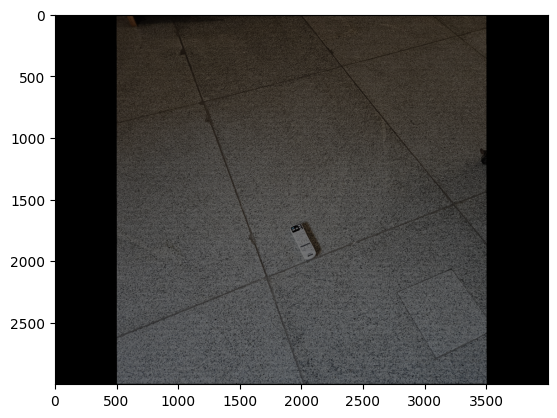

In [41]:
plt.imshow(np_img_rotate_unwarped)